In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2
import psutil

npool = psutil.cpu_count() - 1

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [2]:
posterior_dict = pickle.load(open("events.pkl", "rb"))
    
print(f"Using {len(posterior_dict)} events.")

Using 69 events.


In [3]:
population_model = "PBH-lognormal-1st"
cosmology_model = 'flatLCDM'
outdir = f'results/H0_GWTC-3_{population_model}_{cosmology_model}_final/'
injections.update_cut(snr_cut=9, ifar_cut=0)

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [4]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315
# prior_dict['σc'] = 0.5

# prior_dict["kappa"] = bilby.core.prior.Uniform(-6, 6, name='kappa')
# prior_dict["mmax"] = bilby.core.prior.Uniform(-6, 6, name='kappa')

prior_dict


{'mc': Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None),
 'σc': Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

10:18 bilby INFO    : Running for label 'dynesty', output will be saved to 'results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final/'
10:18 bilby INFO    : Search parameters:
10:18 bilby INFO    :   mc = Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None)
10:18 bilby INFO    :   σc = Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None)
10:18 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None)
10:18 bilby INFO    :   H0 = 67.4
10:18 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:123: RuntimeWarning: divide by zero encountered in log
10:18 bilby INFO    : Single likelihood evaluation took 1.344e-01 s


0it [00:00, ?it/s]

10:18 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 31, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f787b0c4940>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
10:18 bilby INFO    : Checkpoint every check_point_delta_t = 60s
10:18 bilby INFO    : Using dynesty version 1.0.1
10:18 bilby INFO    : Using the bilby-implemented rwalk sampl

2135it [00:10, 207.43it/s, bound:34 nc: 30 ncall:2.9e+04 eff:7.4% logz=-1786.22+/-0.15 dlogz:28.345>0.1]

10:18 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2337it [01:14,  9.13it/s, bound:56 nc: 34 ncall:3.6e+04 eff:6.5% logz=-1781.33+/-0.16 dlogz:23.112>0.1] 

10:19 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2544it [02:23,  3.32it/s, bound:80 nc: 37 ncall:4.4e+04 eff:5.8% logz=-1777.53+/-0.16 dlogz:18.926>0.1]

10:20 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2720it [03:25,  2.91it/s, bound:103 nc: 40 ncall:5.1e+04 eff:5.3% logz=-1774.44+/-0.16 dlogz:15.482>0.1]

10:21 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2899it [04:29,  2.82it/s, bound:125 nc: 40 ncall:5.8e+04 eff:5.0% logz=-1772.00+/-0.16 dlogz:12.686>0.1]

10:22 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3081it [05:33,  2.92it/s, bound:149 nc: 40 ncall:6.6e+04 eff:4.7% logz=-1769.97+/-0.16 dlogz:10.287>0.1]

10:23 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3260it [06:37,  2.81it/s, bound:172 nc: 40 ncall:7.3e+04 eff:4.5% logz=-1768.48+/-0.16 dlogz:8.435>0.1] 

10:24 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3439it [07:43,  2.73it/s, bound:195 nc: 40 ncall:8.0e+04 eff:4.3% logz=-1767.26+/-0.17 dlogz:6.859>0.1]

10:26 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3620it [08:49,  2.82it/s, bound:218 nc: 40 ncall:8.8e+04 eff:4.1% logz=-1766.26+/-0.17 dlogz:5.505>0.1]

10:27 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3799it [09:54,  2.76it/s, bound:241 nc: 40 ncall:9.5e+04 eff:4.0% logz=-1765.49+/-0.17 dlogz:4.377>0.1]

10:28 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
10:28 bilby INFO    : Writing 116 current samples to results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3976it [10:59,  2.76it/s, bound:264 nc: 40 ncall:1.0e+05 eff:3.9% logz=-1764.89+/-0.17 dlogz:3.442>0.1]

10:29 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
10:29 bilby INFO    : Writing 121 current samples to results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4151it [12:06,  2.61it/s, bound:287 nc: 40 ncall:1.1e+05 eff:3.8% logz=-1764.40+/-0.17 dlogz:2.646>0.1]

10:30 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
10:30 bilby INFO    : Writing 205 current samples to results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4329it [13:10,  2.86it/s, bound:310 nc: 40 ncall:1.2e+05 eff:3.7% logz=-1764.00+/-0.17 dlogz:1.988>0.1]

10:31 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
10:31 bilby INFO    : Writing 285 current samples to results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4504it [14:15,  2.69it/s, bound:334 nc: 40 ncall:1.3e+05 eff:3.6% logz=-1763.70+/-0.17 dlogz:1.471>0.1]

10:32 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
10:32 bilby INFO    : Writing 410 current samples to results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4683it [15:19,  2.86it/s, bound:357 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1763.47+/-0.17 dlogz:1.050>0.1]

10:33 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
10:33 bilby INFO    : Writing 563 current samples to results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4866it [16:24,  2.85it/s, bound:380 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1763.29+/-0.17 dlogz:0.743>0.1]

10:34 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
10:34 bilby INFO    : Writing 785 current samples to results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5048it [17:28,  2.88it/s, bound:403 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1763.16+/-0.17 dlogz:0.513>0.1]

10:35 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
10:35 bilby INFO    : Writing 1102 current samples to results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5229it [18:32,  2.92it/s, bound:426 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1763.06+/-0.17 dlogz:0.353>0.1]

10:36 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
10:36 bilby INFO    : Writing 1548 current samples to results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5407it [19:35,  2.91it/s, bound:450 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1762.99+/-0.18 dlogz:0.244>0.1]

10:37 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
10:37 bilby INFO    : Writing 1597 current samples to results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5587it [20:40,  2.85it/s, bound:473 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1762.93+/-0.18 dlogz:0.168>0.1]

10:39 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
10:39 bilby INFO    : Writing 1574 current samples to results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5770it [21:44,  2.88it/s, bound:496 nc: 40 ncall:1.8e+05 eff:3.3% logz=-1762.89+/-0.18 dlogz:0.115>0.1]

10:40 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
10:40 bilby INFO    : Writing 1577 current samples to results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5828it [22:07,  2.62it/s, bound:504 nc: 80 ncall:1.8e+05 eff:3.2% logz=-1762.88+/-0.18 dlogz:0.102>0.1]

10:40 bilby INFO    : Written checkpoint file results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_resume.pickle
10:40 bilby INFO    : Writing 1622 current samples to results/H0_GWTC-3_PBH-lognormal-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
10:40 bilby INFO    : Starting to close worker pool.
10:40 bilby INFO    : Finished closing worker pool.


5837it [22:09,  4.39it/s, bound:505 nc:  1 ncall:1.8e+05 eff:3.5% logz=-1762.80+/-0.18 dlogz:0.000>0.1]

10:40 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:40 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:40 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:40 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:40 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:40 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:40 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:40 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
10:40 bilby WARNING : Multiple likelihood matches found between 

10:40 bilby INFO    : Sampling time: 0:31:14.391274
10:40 bilby INFO    : Summary of results:
nsamples: 6337
ln_noise_evidence:    nan
ln_evidence: -1762.795 +/-  0.179
ln_bayes_factor:    nan +/-  0.179



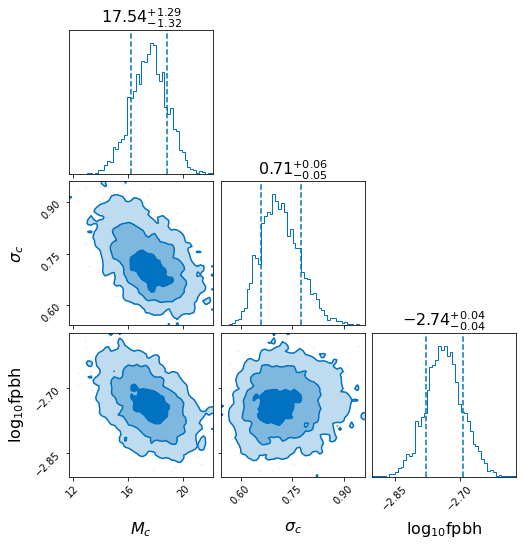

In [5]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=npool, parallel=2000, check_point_delta_t=60)
result.plot_corner()
